### Notebook 2.2: Preprocessing - Outliers
**Author:<br>
Tashi T. Gurung**<br>
**hseb.tashi@gmail.com**

### Project Objective

The primary aim of this project is to predict and understand the factors contributing to the failure of water points located throughout Tanzania.

### Background

Tanzania faces a critical challenge with nearly 50% of its population lacking access to safe drinking water. Among the various sources of water, the country heavily relies on approximately 60,000 water points, predominantly pumps. These water points are spread across diverse geographic regions, making data collection on their conditions a formidable task. Despite efforts involving local agencies and mobile-based crowd-sourcing initiatives, obtaining reliable data remains elusive.

The absence of high-quality data poses several issues, particularly for stakeholders like the Tanzanian Government, notably the Ministry of Water. Consequences encompass increased maintenance expenditures and the myriad of challenges faced by communities when their water access is compromised.

While the development of improved data collection infrastructure is a long-term goal, this project aspires to deliver valuable insights through predictive models, analyses, and uncovering the determinants of water point failure. Our objective is not solely limited to forecasting failures but also to shed light on the underlying causes. These insights will prove instrumental in optimizing resource allocation to maximize water access for individuals and communities. In the long run, this project will aid stakeholders in project planning and inform local, regional, and national-level policy formulation.


---

### Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
# import json file with desired data type information 
json_file_path = '../data/processed/data_types.json'

# Read and load the JSON file into a dictionary
with open(json_file_path, 'r') as json_file:
    data_types_dict = json.load(json_file)

data_types_dict['longitude'] = 'float64'

In [29]:
df = pd.read_csv('../data/processed/post_missing_values_data.csv', dtype=data_types_dict)
df.head(2)

ValueError: cannot safely convert passed user dtype of int64 for float64 dtyped data in column 3

---

### Outlier Detection

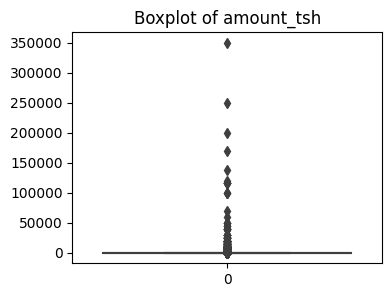

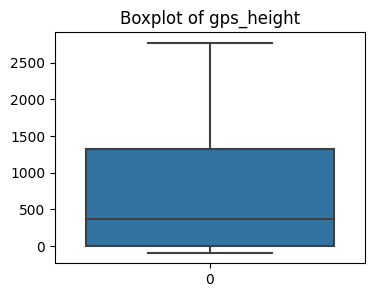

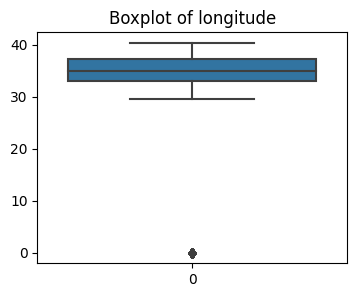

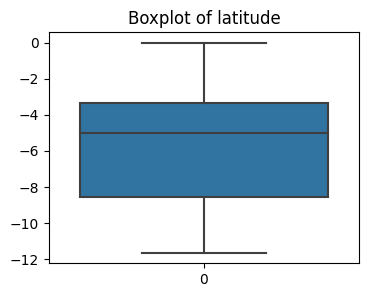

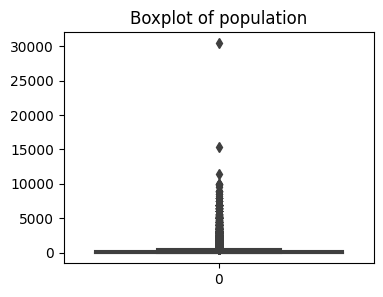

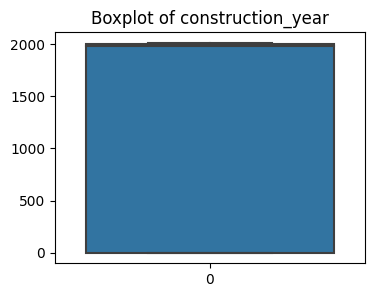

In [ ]:
# Visualizing numerical features for outliers
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(4, 3))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [ ]:
# Exclude irrelevant columns
relevant_numerical_features = [feature for feature in numerical_features if feature not in ['id', 'district_code', 'region_code']]

outliers_dict = {}

for feature in relevant_numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_dict[feature] = len(outliers)

print(outliers_dict)


{'amount_tsh': 11161, 'gps_height': 0, 'longitude': 1812, 'latitude': 0, 'population': 4383, 'construction_year': 0}


**Observation:** <br>
- amount_tsh has 11161 outliers
- gps_height has 8231 outliers
- population has 7682 outliers

**Action:**
- check the skewness
- if highly skewed, apply log transformation


In [ ]:
# Check skewness of 'amount_tsh'
skewness = df['amount_tsh'].skew()
print(f"Skewness of amount_tsh: {skewness}")

Skewness of amount_tsh: 57.8077999458852


**Observation:**
- high positive skewness representing high skewness to the right, with a long tail on the right

**Action:**
- Apply log transformation

In [ ]:
# Apply log transformation to 'amount_tsh'
df['amount_tsh_log'] = np.log(df['amount_tsh'])


c:\Users\Tashi Nyangmi\Desktop\tanzania-water-pump-classification\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


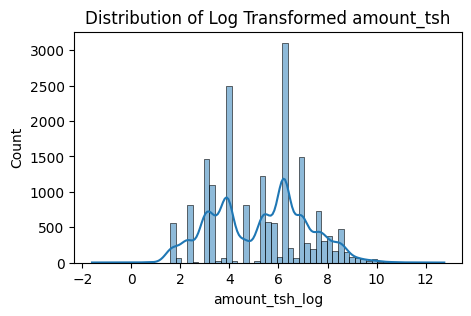

In [ ]:
# Visualize the distribution of the transformed feature
plt.figure(figsize=(5, 3))
sns.histplot(df['amount_tsh_log'], kde=True)
plt.title('Distribution of Log Transformed amount_tsh')
plt.show()


In [ ]:
df.drop(columns=['amount_tsh'], inplace=True)

### gps_height

In [ ]:
# Check skewness of 'gps_height'
skewness_gps = df['gps_height'].skew()
print(f"Skewness of gps_height: {skewness_gps}")


Skewness of gps_height: 0.4624020849809572


**Observation:**
- low skewness, so there no strong need for transformation

**Action:**
- cap the extreme values by replacing them with a threshold value
- lets cap the upper outliers at 99th percentile value

In [ ]:
# Define the upper bound threshold for capping
upper_threshold = df['gps_height'].quantile(0.99)

# Cap upper outliers
df['gps_height_capped'] = df['gps_height'].apply(lambda x: upper_threshold if x > upper_threshold else x)

### population

In [ ]:
# Check skewness of 'population'
skewness = df['population'].skew()
print(f"Skewness of population: {skewness}")

Skewness of population: 12.660713588843592


In [ ]:
# Apply log transformation to 'population'
df['population_log'] = np.log(df['population'])


c:\Users\Tashi Nyangmi\Desktop\tanzania-water-pump-classification\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Export modifed dataset

In [ ]:
# Specify the file path where you want to save the DataFrame
file_path = '../data/processed/preprocessed_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)